<a href="https://colab.research.google.com/github/halen48/image-processing/blob/main/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependências que são utilizadas corriqueiramente

In [ ]:
import PIL
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#Trabalhando com a imagem

##Baixando uma imagem

In [ ]:
DIRETORIO_BASE = "/content/" #@param
NOME_ARQUIVO = "imagem.jpg" #@param
URL_IMAGEM = "https://64.media.tumblr.com/avatar_2c3963d7613c_128.pnj" #@param

In [ ]:
caminho_arq_baixado = "%s/%s"%(DIRETORIO_BASE, NOME_ARQUIVO)
!wget $URL_IMAGEM -O $caminho_arq_baixado

--2022-08-17 00:47:59--  https://64.media.tumblr.com/avatar_2c3963d7613c_128.pnj
Resolving 64.media.tumblr.com (64.media.tumblr.com)... 192.0.77.3
Connecting to 64.media.tumblr.com (64.media.tumblr.com)|192.0.77.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5657 (5.5K) [image/jpeg]
Saving to: ‘/content//imagem.jpg’

/content//imagem.jp 100%[===================>]   5.52K  --.-KB/s    in 0s      

2022-08-17 00:47:59 (63.1 MB/s) - ‘/content//imagem.jpg’ saved [5657/5657]



##Abrindo Imagem

###Com OpenCV

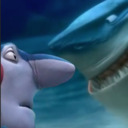

In [ ]:
img = cv.imread(caminho_arq_baixado)
cv2_imshow(img)

###Canais da imagem<br>
```
Uma imagem pode ser composta por três canais: Red, Green e Blue, 
cada um com valores variando entre 0~255 para cada
pixel (256 valores -> 2^24 cores, 24 bits)
```

In [ ]:
print("Dimensão da imagem:", img.shape)
for i,canal in enumerate(["Vermelho","Verde", "Azul"]):
  cv.imwrite("canal_%s.png"%canal,img[:,:,i])

Dimensão da imagem: (128, 128, 3)


###<a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121">Zoom na imagem</a>

```
INTER_NEAREST 
Python: cv.INTER_NEAREST
nearest neighbor interpolation

INTER_LINEAR 
Python: cv.INTER_LINEAR
bilinear interpolation

INTER_CUBIC 
Python: cv.INTER_CUBIC
bicubic interpolation

INTER_AREA 
Python: cv.INTER_AREA
resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire'-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.

INTER_LANCZOS4 
Python: cv.INTER_LANCZOS4
Lanczos interpolation over 8x8 neighborhood

INTER_LINEAR_EXACT 
Python: cv.INTER_LINEAR_EXACT
Bit exact bilinear interpolation

INTER_NEAREST_EXACT 
Python: cv.INTER_NEAREST_EXACT
Bit exact nearest neighbor interpolation. This will produce same results as the nearest neighbor method in PIL, scikit-image or Matlab.

INTER_MAX 
Python: cv.INTER_MAX
mask for interpolation codes

WARP_FILL_OUTLIERS 
Python: cv.WARP_FILL_OUTLIERS
flag, fills all of the destination image pixels. If some of them correspond to outliers in the source image, they are set to zero
```

In [ ]:
TAMANHO_ZOOM = (4,4)

####Interpolação Vizinho mais proximo

In [ ]:
vizinho_mais_proximo = cv.resize(img, None, fx=TAMANHO_ZOOM[0], fy=TAMANHO_ZOOM[1], interpolation = cv.INTER_NEAREST)

#####Visualizar

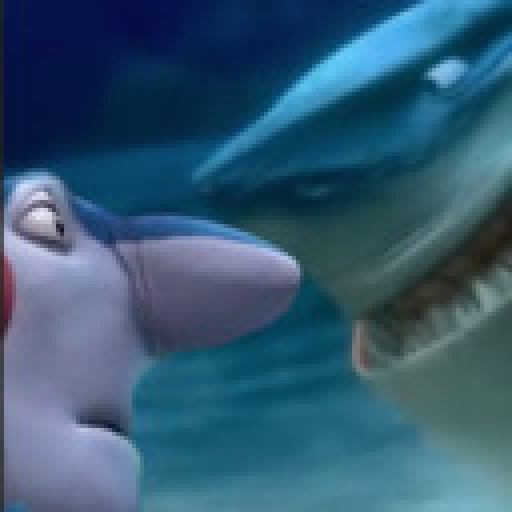

In [ ]:
cv2_imshow(vizinho_mais_proximo)

####Interpolação Cubica

In [ ]:
cubic = cv.resize(img, None, fx=TAMANHO_ZOOM[0], fy=TAMANHO_ZOOM[1], interpolation = cv.INTER_CUBIC)

#####Visualizar

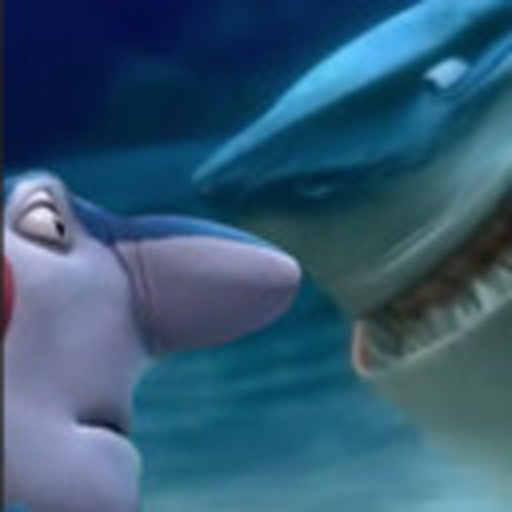

In [ ]:
cv2_imshow(cubic)

###Diferença entre as interpolações

In [ ]:
mat_vmp = np.array(vizinho_mais_proximo)
mat_cub = np.array(cubic)

dif = PIL.Image.fromarray(mat_cub-mat_vmp)
dif.save("diferenca.jpg")

dif = np.array(dif)
#para cada canal
for i,canal in enumerate(["vermelho", "verde", "azul"]):
  canal_separado = dif[:,:,i]
  PIL.Image.fromarray(canal_separado).save("diferenca_canal_%s.jpg"%canal)
  #Se um pixel A é igual ao pixel B, logo A-B = 0
  pixeis_diferentes = canal_separado[canal_separado > 0]
  print("O canal %s da imagem tem diferença de %.2f%% em relação as interpoações"%(canal, 100*float(pixeis_diferentes.size/canal_separado.size)))

O canal vermelho da imagem tem diferença de 66.70% em relação as interpoações
O canal verde da imagem tem diferença de 64.54% em relação as interpoações
O canal azul da imagem tem diferença de 61.31% em relação as interpoações
